In [1]:

import pandas as pd
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
path_train = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Train_rrlyr-1.csv'
path_test = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Test_rrlyr-1.csv'
lc_test = pd.read_table(path_test, sep= ',')
lc_train = pd.read_table(path_train, sep= ',')

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


In [31]:
predTest = lc_test['Pred']
predTrain = lc_train['Pred']

In [32]:
predTrain = lc_train['Pred'].sample(1000)
predTest = lc_test['Pred'].sample(1000)

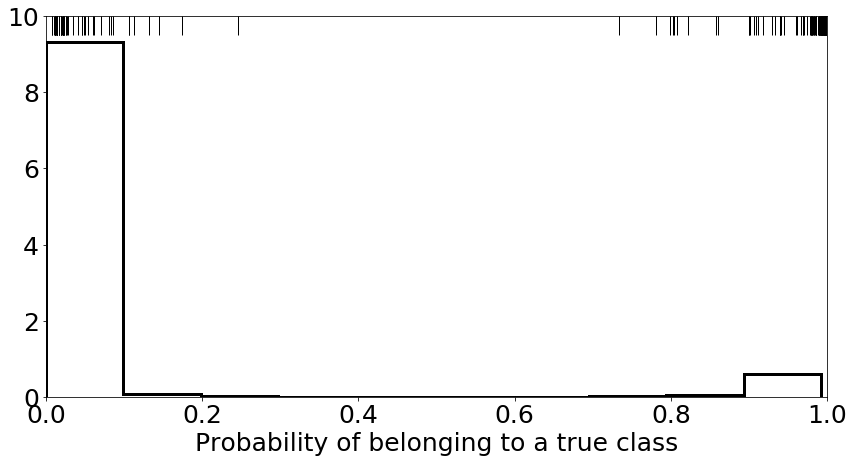

In [35]:
rc={'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 25.0, 'axes.titlesize': 18}
plt.rcParams.update(**rc)


fig, ax = plt.subplots(figsize=(14, 7))
plt.xlim(0,)
sns.distplot(1-predTrain, rug=False, hist=True, kde=False, color='black',  kde_kws={"color": "k", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "black"}, norm_hist=True, bins =10);

upper_rugplot(predTrain, ax=ax, color='black')
plt.ylim(0,10)
plt.xlabel('Probability of belonging to a true class')
plt.show()

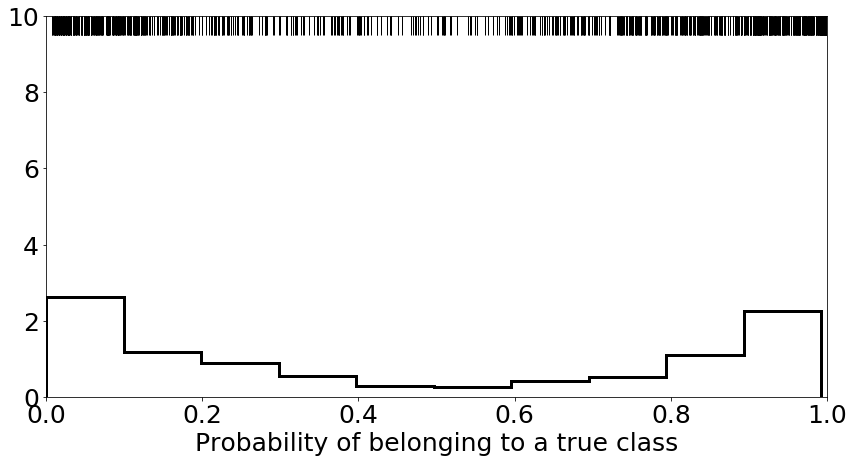

In [36]:
rc={'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 25.0, 'axes.titlesize': 18}
plt.rcParams.update(**rc)


fig, ax = plt.subplots(figsize=(14, 7))
plt.xlim(0,)
sns.distplot(1-predTest, rug=False, hist=True, kde=False, color='black',  kde_kws={"color": "k", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "black"}, norm_hist=True, bins =10);

upper_rugplot(predTest, ax=ax, color='black')
plt.ylim(0,10)
plt.xlabel('Probability of belonging to a true class')
plt.show()


